# AirBnB Data Exploration
## by Choonghor Woon


## Dataset

I used the data from one of the most popular vacation rentals platform, Airbnb to deep dive into my questions. The data that I used contains 3.5K-3.8K of rental listings covering both Boston and Seattle markets with detail features such as: price, availability, review score ratings and others. In addition, the dataset also contains 68K and 84K of user comments that can provide additional insight on what matters to user when comes to vacation rentals.

The datasets used in this analysis can be found here:


Boston datasets: https://www.kaggle.com/airbnb/boston
Seattle dataset: https://www.kaggle.com/airbnb/seattle/data

## Scope of Analysis

For this project, i was interested in using AirBnB data for Boston and Seattle to better understand the short term rental market, specifically:

1. Seasonality effect on pricing
2. Pricing difference between weeekdays and weekends
3. Property type that fecthes higher listing price
4. The location factor on pricing
5. Other factors that influence listing price
6. Additional insights from user comments
7. Most common amenities furnished in airbnb listings

In [1]:
# importing libraries needed for my analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os as os
import datetime as dt
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

## Gather

In [2]:
# load dataset
df_listing_bos = pd.read_csv('listings_boston.csv')
df_reviews_bos = pd.read_csv('reviews_boston.csv')
df_cldr_bos = pd.read_csv('calendar_boston.csv')


df_listing_stl = pd.read_csv('listings_stl.csv')
df_reviews_stl = pd.read_csv('reviews_stl.csv')
df_cldr_stl = pd.read_csv('calendar_stl.csv')


## Assess

In [3]:
df_listing_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [4]:
df_listing_stl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

> The listing dataset contains 90+ variables. As not all column variables are relevant to the scope of my study, I will create a smaller dataset with variables pertaining to my analysis and dropped all the other columns. 

In [5]:
df_reviews_bos.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [6]:
df_reviews_stl.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
df_cldr_bos.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [8]:
df_cldr_stl.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [9]:
# Use correlation matrix to understand what factors has most influence on pricing and select the columns for detail analysis
# We need to first change the $ format for pricing to numerical value before we can run correlation matrix

df_listing_bos.price = df_listing_bos.price.replace('[\$,]','',regex=True).astype(float)

df_listing_bos.corr()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
id,1.000000,NaN,0.565820,-0.046503,-0.046503,NaN,0.089842,-0.010871,-0.050574,-0.014424,...,0.050435,0.012260,0.024344,0.030078,0.044997,0.067750,NaN,NaN,-0.040300,0.221421
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.565820,NaN,1.000000,-0.094764,-0.094764,NaN,0.016752,-0.052395,-0.103485,-0.068266,...,0.015577,-0.031821,0.025484,0.016448,0.022717,0.027856,NaN,NaN,-0.090363,0.183057
host_listings_count,-0.046503,NaN,-0.094764,1.000000,1.000000,NaN,0.124228,0.044281,0.160164,0.170443,...,-0.177580,-0.019006,-0.213198,-0.246705,0.015595,-0.207200,NaN,NaN,0.970535,-0.193939
host_total_listings_count,-0.046503,NaN,-0.094764,1.000000,1.000000,NaN,0.124228,0.044281,0.160164,0.170443,...,-0.177580,-0.019006,-0.213198,-0.246705,0.015595,-0.207200,NaN,NaN,0.970535,-0.193939
neighbourhood_group_cleansed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.089842,NaN,0.016752,0.124228,0.124228,NaN,1.000000,0.319327,0.053818,-0.020733,...,-0.040302,0.001623,-0.074478,-0.053077,0.229395,-0.038994,NaN,NaN,0.125827,0.049496
longitude,-0.010871,NaN,-0.052395,0.044281,0.044281,NaN,0.319327,1.000000,0.083658,0.010164,...,0.003487,0.048692,-0.009397,-0.007538,0.038539,-0.001003,NaN,NaN,0.049769,0.109795
accommodates,-0.050574,NaN,-0.103485,0.160164,0.160164,NaN,0.053818,0.083658,1.000000,0.346914,...,0.015450,0.091648,-0.014015,-0.007164,0.008303,-0.006433,NaN,NaN,0.153344,0.007575
bathrooms,-0.014424,NaN,-0.068266,0.170443,0.170443,NaN,-0.020733,0.010164,0.346914,1.000000,...,-0.017573,0.026560,-0.053836,-0.046117,-0.028713,-0.012555,NaN,NaN,0.166171,-0.046208


These are the independent column variables that i will keep based on correlation matrix above. In addition, i am also keeping categorical variable: host_is_superhost, property type, zipcode to better understand the characteristics of the property
>>
'host_listings_count','accommodates', 'price', 
'availability_30','number_of_reviews', 'review_scores_rating',
'review_scores_accuracy', 'review_scores_cleanliness',
'review_scores_checkin', 'review_scores_communication',
'review_scores_location', 'review_scores_value', 'reviews_per_month','host_is_superhost'

#### What identifier other than 'id', 'state'? How about city, zipcode or neighbourhood?



In [10]:
df_listing_bos.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Watertown', 'Brighton',
       'Brighton ', 'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park',
       'Mattapan', 'Milton', 'Dorchester', 'dorchester, boston ',
       'South Boston', 'Allston', 'ALLSTON'], dtype=object)

contains duplicates or foregin character, needs clean-up

In [11]:
df_listing_bos.neighbourhood_cleansed.unique()

array(['Roslindale', 'Jamaica Plain', 'Mission Hill',
       'Longwood Medical Area', 'Bay Village', 'Leather District',
       'Chinatown', 'North End', 'Roxbury', 'South End', 'Back Bay',
       'East Boston', 'Charlestown', 'West End', 'Beacon Hill',
       'Downtown', 'Fenway', 'Brighton', 'West Roxbury', 'Hyde Park',
       'Mattapan', 'Dorchester', 'South Boston Waterfront',
       'South Boston', 'Allston'], dtype=object)

Data looks clean

In [12]:
df_listing_stl.neighbourhood_cleansed.unique()

array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake',
       'Mann', 'Madrona', 'University District', 'Harrison/Denny-Blaine',
       'Minor', 'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake',
       'South Lake Union', 'Lawton Park', 'Briarcliff', 'Belltown',
       'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'Fairmount Park', 'Genesee', 'Interbay', 'Industrial District',
       'Mid-Beacon Hill', 'South Beacon Hill', 'Greenwood', 'Holly Park',
       'Fauntleroy', 'North Beacon Hill', 'Mount Baker', 'Brighton',
       'South Delridge', 'View Ridge', 'Dunlap', 'Rainier Beach',
       'Columbia City', 'Seward Park', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Broadway', 'Loyal Heights', 'Vict

A lots of duplicate with slightly different name. Suggest using zipcode instead

In [13]:
df_listing_stl.neighbourhood_cleansed.unique()

array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake',
       'Mann', 'Madrona', 'University District', 'Harrison/Denny-Blaine',
       'Minor', 'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake',
       'South Lake Union', 'Lawton Park', 'Briarcliff', 'Belltown',
       'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'Fairmount Park', 'Genesee', 'Interbay', 'Industrial District',
       'Mid-Beacon Hill', 'South Beacon Hill', 'Greenwood', 'Holly Park',
       'Fauntleroy', 'North Beacon Hill', 'Mount Baker', 'Brighton',
       'South Delridge', 'View Ridge', 'Dunlap', 'Rainier Beach',
       'Columbia City', 'Seward Park', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Broadway', 'Loyal Heights', 'Vict

Data looks clean

### Is host_listing_count same as host_total_listings_count?

In [14]:
sum(df_listing_bos.host_listings_count !=df_listing_bos.host_total_listings_count )

0

df_listing_bos.host_listings_count is the same as df_listing_bos.host_total_listings_count, we can just keep either one of these columns

## Preliminary Wrangling


 The columns of interest are: 

>>'id', 'host_is_superhost', 'host_listings_count', 'state','neighbourhood_cleansed','accommodates', 'price', 'weekly_price', 'monthly_price',
'availability_30', 'availability_60', 'availability_90',
'availability_365', 'number_of_reviews', 'review_scores_rating',
'review_scores_accuracy', 'review_scores_cleanliness',
'review_scores_checkin', 'review_scores_communication',
'review_scores_location', 'review_scores_value', 'reviews_per_month'



In [15]:
# define column that we want for our smaller listing dataframe
var= ['id', 'host_is_superhost', 'host_listings_count', 'state', 'neighbourhood_cleansed',
       'accommodates', 'price', 'availability_30', 'number_of_reviews', 'review_scores_rating','property_type',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month']


In [16]:
# copy and create the smaller listing dataframe for Boston and Seattle

df_listing_bos_clean = df_listing_bos[var].copy()
df_listing_stl_clean = df_listing_stl[var].copy()


In [17]:
# quick look on boston listing df
df_listing_bos_clean.head()

,id,host_is_superhost,host_listings_count,state,neighbourhood_cleansed,accommodates,price,availability_30,number_of_reviews,review_scores_rating,property_type,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,12147973,f,1,MA,Roslindale,4,250.0,0,0,NaN,House,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,f,1,MA,Roslindale,2,65.0,26,36,94.0,Apartment,10.0,9.0,10.0,10.0,9.0,9.0,1.30
2,6976,t,1,MA,Roslindale,2,65.0,19,41,98.0,Apartment,10.0,9.0,10.0,10.0,9.0,10.0,0.47
3,1436513,f,1,MA,Roslindale,4,75.0,6,1,100.0,House,10.0,10.0,10.0,10.0,10.0,10.0,1.00
4,7651065,t,1,MA,Roslindale,2,79.0,13,29,99.0,House,10.0,10.0,10.0,10.0,9.0,10.0,2.25


In [18]:
# quick look on Seattle listing df
df_listing_stl_clean.head()

,id,host_is_superhost,host_listings_count,state,neighbourhood_cleansed,accommodates,price,availability_30,number_of_reviews,review_scores_rating,property_type,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,241032,f,3.0,WA,West Queen Anne,4,$85.00,14,207,95.0,Apartment,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,953595,t,6.0,WA,West Queen Anne,4,$150.00,13,43,96.0,Apartment,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,3308979,f,2.0,WA,West Queen Anne,11,$975.00,1,20,97.0,House,10.0,10.0,10.0,10.0,10.0,10.0,1.15
3,7421966,f,1.0,WA,West Queen Anne,3,$100.00,0,0,NaN,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,278830,f,2.0,WA,West Queen Anne,6,$450.00,30,38,92.0,House,9.0,9.0,10.0,10.0,9.0,9.0,0.89


In [19]:
# same columns for both dataset?
df_listing_bos_clean.shape[1] == df_listing_stl_clean.shape[1], df_listing_bos_clean.columns.any()==df_listing_stl_clean.columns.any()

(True, True)

#### Boston data

In [20]:
# review Boston listing data structure
df_listing_bos_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3585 non-null   int64  
 1   host_is_superhost            3585 non-null   object 
 2   host_listings_count          3585 non-null   int64  
 3   state                        3585 non-null   object 
 4   neighbourhood_cleansed       3585 non-null   object 
 5   accommodates                 3585 non-null   int64  
 6   price                        3585 non-null   float64
 7   availability_30              3585 non-null   int64  
 8   number_of_reviews            3585 non-null   int64  
 9   review_scores_rating         2772 non-null   float64
 10  property_type                3582 non-null   object 
 11  review_scores_accuracy       2762 non-null   float64
 12  review_scores_cleanliness    2767 non-null   float64
 13  review_scores_chec

1. id is integer. This might be problematic if we want to link with other df. Change it to object
2. price is object instead of float. Most likely due to dollar sign.Change this to float
3. No missing value on response variable: price
4. Missing values on different review scores. Will inpute to fill the null
5. Some missing values for zipcode but there is no easy way to input. Leave it as is


In [21]:
df_reviews_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


1. listing_id is int64 instead of object. no need to clean if not linking with other dataframe
2. date is object istead of timeobject. need to change
3. reviewer_id should be object

In [22]:
df_cldr_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


1. listing_id is int64 instead of object. no need to clean if not linking with other dataframe
2. price is object intead of float
3. date is not time stamped

In [23]:
df_listing_bos.id.nunique()

3585

No duplicates id. This appears to be unique identifier. We can use this to link with review dataframe

In [24]:
print (df_listing_bos.state.nunique(), df_listing_bos.state.notnull().sum())

1 3585


Only one value in state column and we have no nulls. We can use 'state' to differentiate Boston and Seattle market if we decide to merge it

In [25]:
df_listing_bos_clean.describe()

,id,host_listings_count,accommodates,price,availability_30,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3.585000e+03,3585.000000,3585.000000,3585.000000,3585.00000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,2829.000000
mean,8.440875e+06,58.902371,3.041283,173.925802,8.64993,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1.970908
std,4.500787e+06,171.119663,1.778929,148.331321,10.43533,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,2.120561
min,3.353000e+03,0.000000,1.000000,10.000000,0.00000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,0.010000
25%,4.679319e+06,1.000000,2.000000,85.000000,0.00000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.480000
50%,8.577620e+06,2.000000,2.000000,150.000000,4.00000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.170000
75%,1.278953e+07,7.000000,4.000000,220.000000,15.00000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.720000
max,1.493346e+07,749.000000,16.000000,4000.000000,30.00000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.150000


nothing out of the norm is observed

#### Seatlle data

In [26]:
df_listing_stl_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3818 non-null   int64  
 1   host_is_superhost            3816 non-null   object 
 2   host_listings_count          3816 non-null   float64
 3   state                        3818 non-null   object 
 4   neighbourhood_cleansed       3818 non-null   object 
 5   accommodates                 3818 non-null   int64  
 6   price                        3818 non-null   object 
 7   availability_30              3818 non-null   int64  
 8   number_of_reviews            3818 non-null   int64  
 9   review_scores_rating         3171 non-null   float64
 10  property_type                3817 non-null   object 
 11  review_scores_accuracy       3160 non-null   float64
 12  review_scores_cleanliness    3165 non-null   float64
 13  review_scores_chec

1. id is integer. This might be problematic if we want to link with other df. Change it to object
2. price is object instead of float. Most likely due to dollar sign.Change this to float
3. No missing value on response variable: price
4. Missing values on different review scores. Will inpute to fill the null
5. Some missing values for zipcode but there is no easy way to input. Leave it as is
6. Only 2 missing values for both host_is_superhost and host_listing_count. Can consider dropping

## Clean

**df_listing_bos_clean** and **df_listing_stl_clean**
- id is integer. This might be problematic if we want to link with other df. Change it to object
- price is object instead of float. Most likely due to dollar sign.Change this to float
- Missing values on different review scores. Will inpute to fill the null
- Replace boolean in host_is_superhost with 1,0 so that we can run correlation analysis and if needed regression model


**df_reviews_bos** and **df_reviews_stl**

- id is int64 instead of object.
- date is object istead of timeobject. need to change


**df_cldr_bos** and **df_cldr_stl**

- id is int64 instead of object
- price is object instead of float. Most likely due to dollar sign.Change this to float
- price is only available when the available field is 'f'. Drop NaN values on 'price' column

#### Issue 1: Erroneous datatype for 'id' and 'listing_id'

- Change datatype to object

In [27]:
df_listing_bos_clean.id = df_listing_bos_clean.id.astype('object')
df_listing_stl_clean.id = df_listing_stl_clean.id.astype('object')

df_reviews_bos.listing_id = df_reviews_bos.listing_id.astype('object')
df_reviews_stl.listing_id = df_reviews_stl.listing_id.astype('object')

df_cldr_bos.listing_id = df_cldr_bos.listing_id.astype('object')
df_cldr_stl.listing_id = df_cldr_stl.listing_id.astype('object')

In [28]:
df_listing_bos_clean.id.dtype == df_listing_stl_clean.id.dtype == 'object'

True

In [29]:
df_reviews_bos.listing_id.dtype == df_reviews_stl.listing_id.dtype == 'object'

True

In [30]:
df_cldr_bos.listing_id.dtype == df_cldr_stl.listing_id.dtype == 'object'

True

#### Issue 2: Incorrect 'price'  datatype. It is object. Need numerical value to understand distribution.

- Remove $ by using regex
- change dtype to float

In [31]:
df_listing_bos_clean.price = df_listing_bos_clean.price.replace('[\$,]','',regex=True).astype(float)
df_listing_stl_clean.price = df_listing_stl_clean.price.replace('[\$,]','',regex=True).astype(float)


df_cldr_bos.price=df_cldr_bos.price.replace('[\$,]','',regex=True).astype(float)
df_cldr_stl.price=df_cldr_stl.price.replace('[\$,]','',regex=True).astype(float)

In [32]:
df_listing_bos_clean.price.dtype == df_listing_bos_clean.price.dtype == 'float64'

True

In [33]:
df_cldr_bos.price.dtype == df_cldr_stl.price.dtype == 'float64'

True

#### Issue 3: Handling missing values for
- review_scores_rating         
- review_scores_accuracy       
- review_scores_cleanliness    
- review_scores_checkin        
- review_scores_communication  
- review_scores_location       
- review_scores_value          
- reviews_per_month 


In [34]:
fill_mean = lambda col: col.fillna(col.mean())

miss_col=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
          'review_scores_checkin','review_scores_communication','review_scores_location',
          'review_scores_value','reviews_per_month' ]    
    
df_listing_bos_clean[miss_col] = df_listing_bos_clean[miss_col].apply(fill_mean,axis=0)
df_listing_stl_clean[miss_col] = df_listing_stl_clean[miss_col].apply(fill_mean,axis=0)


In [35]:
df_listing_bos_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3585 non-null   object 
 1   host_is_superhost            3585 non-null   object 
 2   host_listings_count          3585 non-null   int64  
 3   state                        3585 non-null   object 
 4   neighbourhood_cleansed       3585 non-null   object 
 5   accommodates                 3585 non-null   int64  
 6   price                        3585 non-null   float64
 7   availability_30              3585 non-null   int64  
 8   number_of_reviews            3585 non-null   int64  
 9   review_scores_rating         3585 non-null   float64
 10  property_type                3582 non-null   object 
 11  review_scores_accuracy       3585 non-null   float64
 12  review_scores_cleanliness    3585 non-null   float64
 13  review_scores_chec

In [36]:
df_listing_stl_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3818 non-null   object 
 1   host_is_superhost            3816 non-null   object 
 2   host_listings_count          3816 non-null   float64
 3   state                        3818 non-null   object 
 4   neighbourhood_cleansed       3818 non-null   object 
 5   accommodates                 3818 non-null   int64  
 6   price                        3818 non-null   float64
 7   availability_30              3818 non-null   int64  
 8   number_of_reviews            3818 non-null   int64  
 9   review_scores_rating         3818 non-null   float64
 10  property_type                3817 non-null   object 
 11  review_scores_accuracy       3818 non-null   float64
 12  review_scores_cleanliness    3818 non-null   float64
 13  review_scores_chec

> missing values from the review score variables been filled with mean

#### Issue 4: Replace boolean in host_is_superhost with 1 and 0

In [37]:
df_listing_bos_clean.host_is_superhost.replace('t', 1, inplace=True)
df_listing_bos_clean.host_is_superhost.replace('f', 0, inplace=True)
df_listing_stl_clean.host_is_superhost.replace('t', 1, inplace=True)
df_listing_stl_clean.host_is_superhost.replace('f', 0, inplace=True)

In [38]:
df_listing_bos_clean.host_is_superhost.unique()

array([0, 1], dtype=int64)

In [39]:
df_listing_stl_clean.host_is_superhost.unique()

array([ 0.,  1., nan])

There are nulls and since there is only 2 nulls, we can consider dropping the rows

In [40]:
df_listing_stl_clean.host_is_superhost[df_listing_stl_clean.host_is_superhost.isnull() ==True]

1297   NaN
1419   NaN
Name: host_is_superhost, dtype: float64

host is superhost datatype is float, need to change it to integer

In [41]:
df_listing_stl_clean = df_listing_stl_clean.dropna(subset=['host_is_superhost'], how='any')

In [42]:
df_listing_stl_clean.host_is_superhost[df_listing_stl_clean.host_is_superhost.isnull() ==True]

Series([], Name: host_is_superhost, dtype: float64)

Null has been dropped

In [43]:
# change dtype from float to integer
df_listing_stl_clean.host_is_superhost = df_listing_stl_clean.host_is_superhost.astype('int64')



In [44]:
df_listing_stl_clean.host_is_superhost.dtype

dtype('int64')

datatype has been changed from float to integer

#### Issue 5: Incorrect 'id'  datatype in df_reviews

- change dtype to object

In [45]:
df_reviews_bos.id = df_reviews_bos.id.astype('object')
df_reviews_stl.id = df_reviews_stl.id.astype('object')

df_reviews_bos.id.dtype == df_reviews_stl.id.dtype == 'object'

True

#### Issue 6: Incorrect 'date'  datatype in df_reviews

- change dtype to datetime

In [46]:
df_reviews_bos.date = pd.to_datetime(df_reviews_bos.date)
df_reviews_stl.date = pd.to_datetime(df_reviews_stl.date)
df_cldr_bos.date=pd.to_datetime(df_cldr_bos.date)
df_cldr_stl.date=pd.to_datetime(df_cldr_stl.date)


In [47]:
df_reviews_bos.date.dtype==  df_reviews_stl.date.dtype =='datetime64[ns]'

True

In [48]:
df_cldr_bos[df_cldr_bos.price.isnull()].available.unique()

array(['f'], dtype=object)

In [49]:
df_cldr_stl[df_cldr_stl.price.isnull()].available.unique()

array(['f'], dtype=object)

price is only available when the 'available' field is 't'. Drop all fields without price

In [50]:
# dropping null on price column
df_cldr_bos = df_cldr_bos.dropna(subset=['price'], how='any')
df_cldr_stl= df_cldr_stl.dropna(subset=['price'], how='any')

In [51]:
df_cldr_bos.price.isnull().sum()==df_cldr_stl.price.isnull().sum()

True

## Explore

## Is there seasonality effect on different markets?

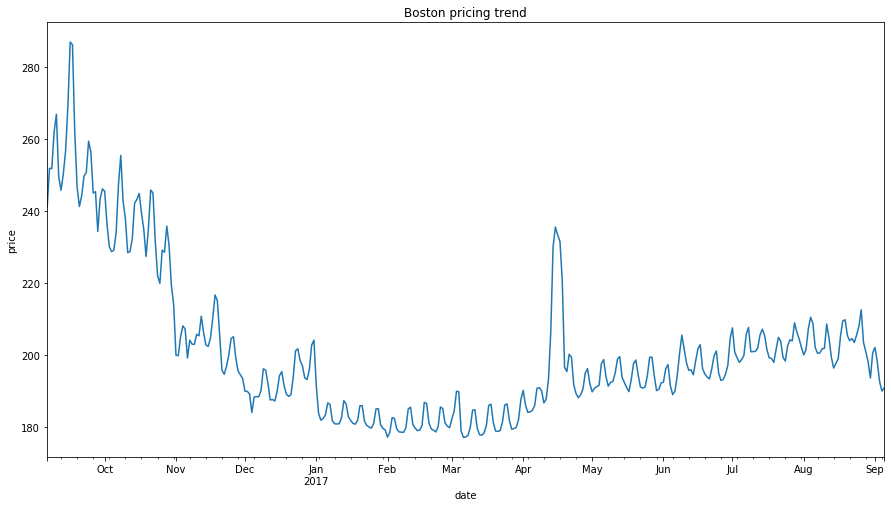

In [52]:
# To plot Boston pricing trend
plt.figure(figsize=[15,8])

df_cldr_bos.groupby('date')['price'].mean().plot(kind='line');
plt.ylabel('price');
plt.title('Boston pricing trend');
plt.savefig('Boston pricing trend', dpi=500)

Boston is more expensive in fall than summer

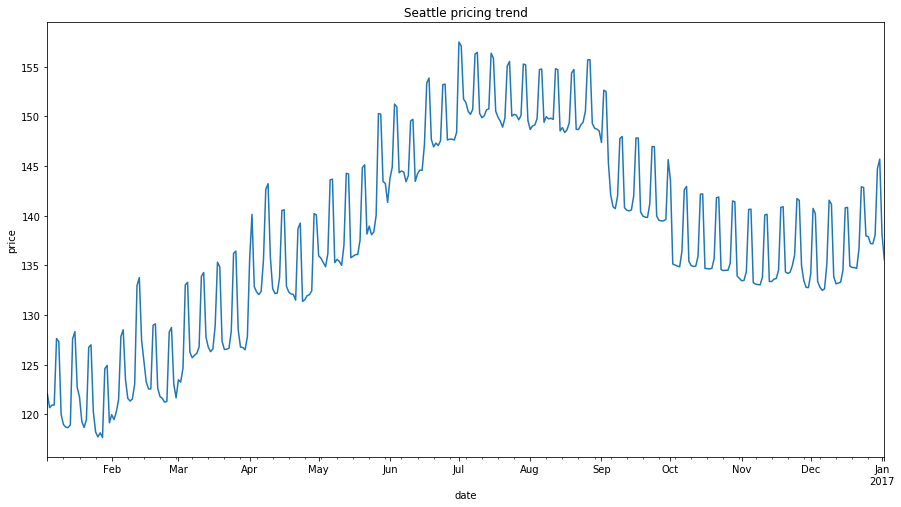

In [54]:
# To plot Boston pricing trend
plt.figure(figsize=[15,8])

df_cldr_stl.groupby('date')['price'].mean().plot(kind='line');
plt.ylabel('price');
plt.title('Seattle pricing trend');
plt.savefig('Seattle pricing trend', dpi=500)

Seattle is more expensive in summer than Winter

## Cheapest rate on which days of a week?

In [55]:
# create a new column call day_of_week. 

df_cldr_bos['day_of_week']= df_cldr_bos.date.dt.day_name()
df_cldr_stl['day_of_week']= df_cldr_stl.date.dt.day_name()

df_cldr_bos

,listing_id,date,available,price,day_of_week
365,3075044,2017-08-22,t,65.0,Tuesday
366,3075044,2017-08-21,t,65.0,Monday
367,3075044,2017-08-20,t,65.0,Sunday
368,3075044,2017-08-19,t,75.0,Saturday
369,3075044,2017-08-18,t,75.0,Friday
...,...,...,...,...,...
1308875,14504422,2016-09-20,t,62.0,Tuesday
1308876,14504422,2016-09-19,t,62.0,Monday
1308877,14504422,2016-09-18,t,62.0,Sunday
1308878,14504422,2016-09-17,t,62.0,Saturday


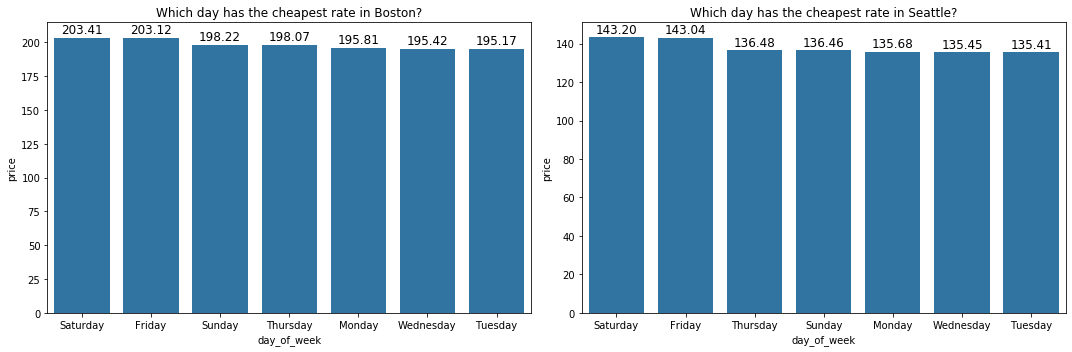

In [56]:
# Plot pricing over days of week for Boston and Seattle

plt.figure(figsize=[15,5], tight_layout=True)
base_color=sb.color_palette()[0]


# Plot1: Boston
plt.subplot(1,2,1)
order =df_cldr_bos.groupby('day_of_week')['price'].mean().sort_values(ascending=False)

plots1= sb.barplot(data=df_cldr_bos, x='day_of_week',y='price',errwidth=0,color=base_color, order=order.index);

# Iterrating over the bars and annotate
for bar in plots1.patches:
        plots1.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, 8),
                       textcoords='offset points')
plt.title('Which day has the cheapest rate in Boston?');
          

#Plot 2: Seattle
plt.subplot(1,2,2)
order =df_cldr_stl.groupby('day_of_week')['price'].mean().sort_values(ascending=False)

plots2= sb.barplot(data=df_cldr_stl, x='day_of_week',y='price',errwidth=0,color=base_color, order=order.index);
# Iterrating over the bars and annotate
for bar in plots2.patches:
        plots2.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, 8),
                       textcoords='offset points')
plt.title('Which day has the cheapest rate in Seattle?');
plt.savefig('day of week pricing trend', dpi=500)

Monday,Tuesday and Wednesday are the cheapest and avoid Saturday and Friday

# what property type fetches higher listing price?

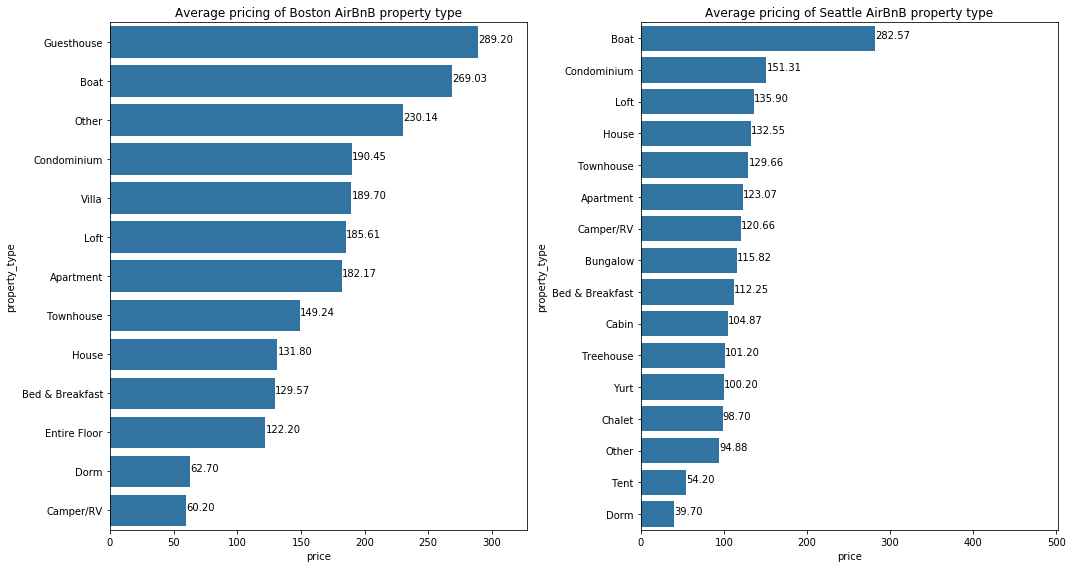

In [57]:
plt.figure(figsize=[15,8], tight_layout=True)
base_color=sb.color_palette()[0]

#Find the order index 

plt.subplot(1,2,1)
order =df_listing_bos_clean.groupby('property_type')['price'].mean().sort_values(ascending=False)

sb.barplot(data=df_listing_bos_clean, y='property_type',x='price',errwidth=0,color=base_color, order=order.index);

# iterate to annotate
for i in range(len(order)):
    x = order[i]+0.2
    y = i
    plt.text(x,y,format(x,'.2f'))

plt.title('Average pricing of Boston AirBnB property type');


plt.subplot(1,2,2)
order =df_listing_stl_clean.groupby('property_type')['price'].mean().sort_values(ascending=False)

sb.barplot(data=df_listing_stl_clean, y='property_type',x='price',errwidth=0,color=base_color, order=order.index);
# iterate to annotate
for i in range(len(order)):
    x = order[i]+0.2
    y = i
    plt.text(x,y,format(x,'.2f'))
plt.title('Average pricing of Seattle AirBnB property type');

plt.savefig('Property type vs price', dpi=500)

- For Boston: Guesthouse, boat, other, condo and Villa are the top 5 most expensive listings
- For Seattle: Boat, condo, loft, house and townhouse are the top 5 most expensive listings

### How to become more profitable, which neighborhood fetches higher price and busier (lower availability)?


In [58]:
# To get Boston average price and availability together

# create smaller dataframe for price per zip
df_price_pernbr= df_listing_bos_clean.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
df_price_pernbr= df_price_pernbr.reset_index()

# create smaller dataframe for availability per zip
df_avail_pernbr= df_listing_bos_clean.groupby('neighbourhood_cleansed')['availability_30'].mean()
df_avail_pernbr= df_avail_pernbr.reset_index()

# merging 2 dataframes
df_merge_avail_price = df_price_pernbr.merge(df_avail_pernbr, on='neighbourhood_cleansed')
df_merge_avail_price.head()

,neighbourhood_cleansed,price,availability_30
0,Mattapan,75.125000,12.916667
1,Hyde Park,86.548387,8.903226
2,Dorchester,91.639405,8.665428
3,Roslindale,98.428571,9.464286
4,West Roxbury,107.108696,11.891304


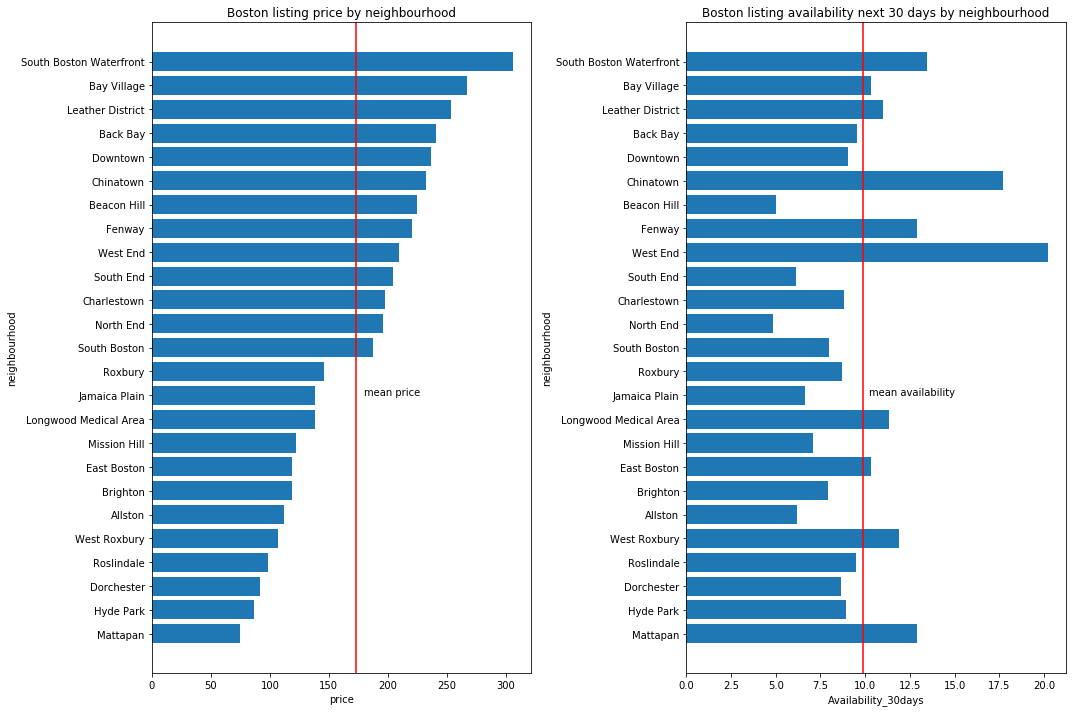

In [59]:
# To plot

x= df_merge_avail_price.neighbourhood_cleansed
y1 = df_merge_avail_price.price
y1_mean= y1.mean()
y2 = df_merge_avail_price.availability_30
y2_mean= y2.mean()

plt.figure(figsize=[15,10], tight_layout=True)
plt.subplot(1,2,1)
plt.barh(x,y1)
plt.axvline(y1_mean, color='r')
plt.text(180,10,'mean price')
plt.xlabel('price')
plt.ylabel('neighbourhood')
plt.title('Boston listing price by neighbourhood')


plt.subplot(1,2,2)
plt.barh(x,y2)
plt.axvline(y2_mean, color='r')
plt.text(10.2,10,'mean availability')
plt.xlabel('Availability_30days')
plt.ylabel('neighbourhood')
plt.title('Boston listing availability next 30 days by neighbourhood')
plt.savefig('Nbr listing price', dpi=500)

- In Descending order, the top 10 neighborhood with highest listing price are South Boston Waterfront, Bay Village, Leather District, Back Bay, Downtown, Chinatown, Beacon Hill, Fenway, West End and South End.

- From the top 10 highest listing price neighbor hood, West end, Chinatown, Fenway and South Boston Waterfront has less than average availability in the next 30 days.

- One of the key takeway here is that when comparing comparable neighborhood with listing price, we should look for neighborhood with lower availability. For example: Chinatown and Downtown neighborhood fetch almost the same listing price but Downtown occupancy rate is higher which means it will be more profitable than Downtown. Key assumption here is that both places are subject to the same seaosanility effect and the availability for next 60, 90 days are in-line with next 30 days trend.





In [60]:
# To get Seattle average price and availability together

# create smaller dataframe for price per zip
df1_price_pernbr= df_listing_stl_clean.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
df1_price_pernbr= df1_price_pernbr.reset_index()

# create smaller dataframe for availability per zip
df1_avail_pernbr= df_listing_stl_clean.groupby('neighbourhood_cleansed')['availability_30'].mean()
df1_avail_pernbr= df1_avail_pernbr.reset_index()

# merging 2 dataframes
df1_merge_avail_price = df1_price_pernbr.merge(df1_avail_pernbr, on='neighbourhood_cleansed')
df1_merge_avail_price.head()

,neighbourhood_cleansed,price,availability_30
0,Rainier Beach,68.555556,24.111111
1,Olympic Hills,71.687500,18.250000
2,South Delridge,74.666667,17.166667
3,Georgetown,76.125000,18.000000
4,North Delridge,76.375000,15.562500


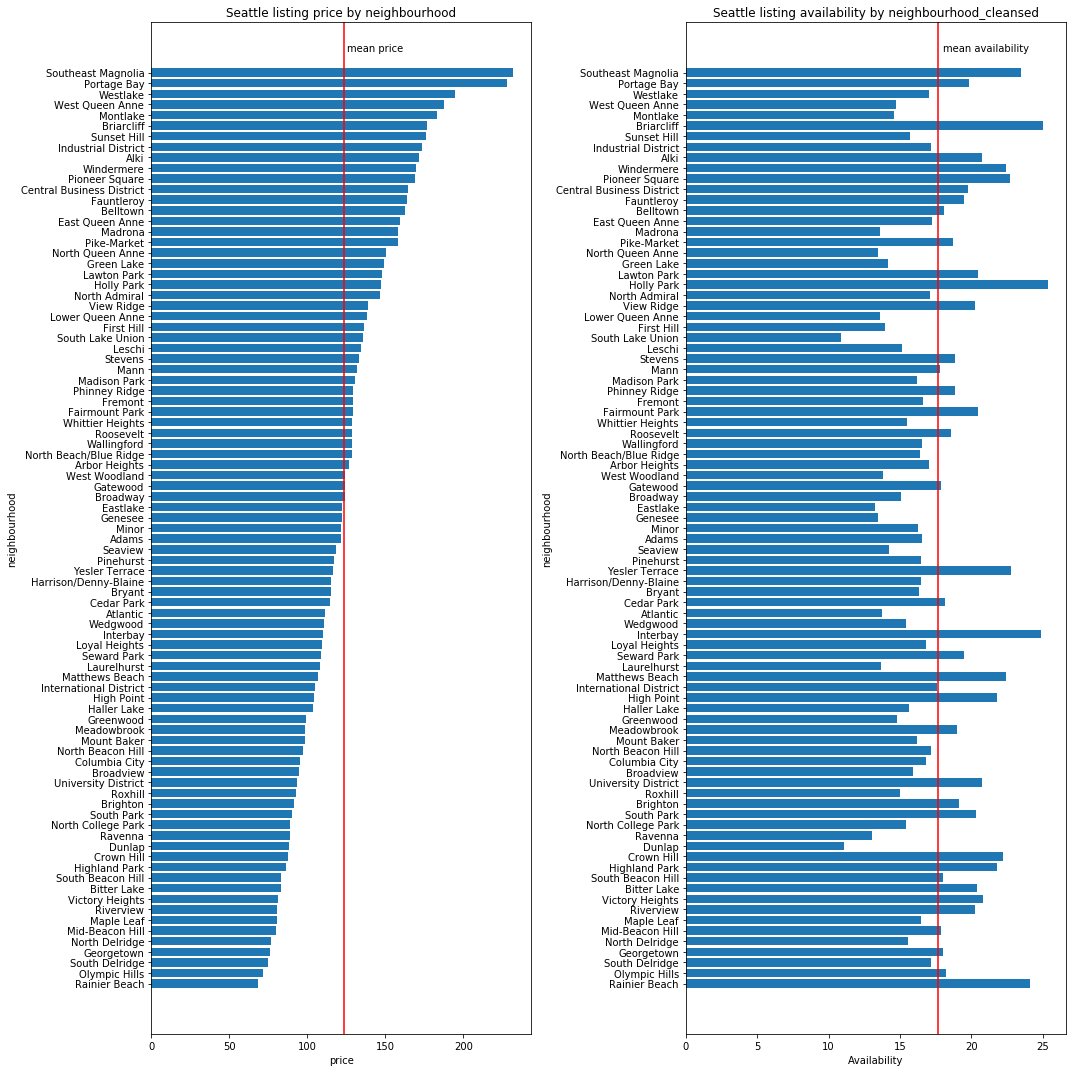

In [61]:
# To plot Seattle data

x= df1_merge_avail_price.neighbourhood_cleansed
y1 = df1_merge_avail_price.price
y1_mean= y1.mean()
y2 = df1_merge_avail_price.availability_30
y2_mean= y2.mean()

plt.figure(figsize=[15,15], tight_layout=True)
plt.subplot(1,2,1)
plt.barh(x,y1)
plt.axvline(y1_mean, color='r')
plt.text(125.5,88,'mean price')
plt.xlabel('price')
plt.ylabel('neighbourhood')
plt.title('Seattle listing price by neighbourhood')


plt.subplot(1,2,2)
plt.barh(x,y2)
plt.axvline(y2_mean, color='r')
plt.text(18,88,'mean availability')
plt.xlabel('Availability')
plt.ylabel('neighbourhood')
plt.title('Seattle listing availability by neighbourhood_cleansed')
plt.savefig('STL Nbr listing price', dpi=500)

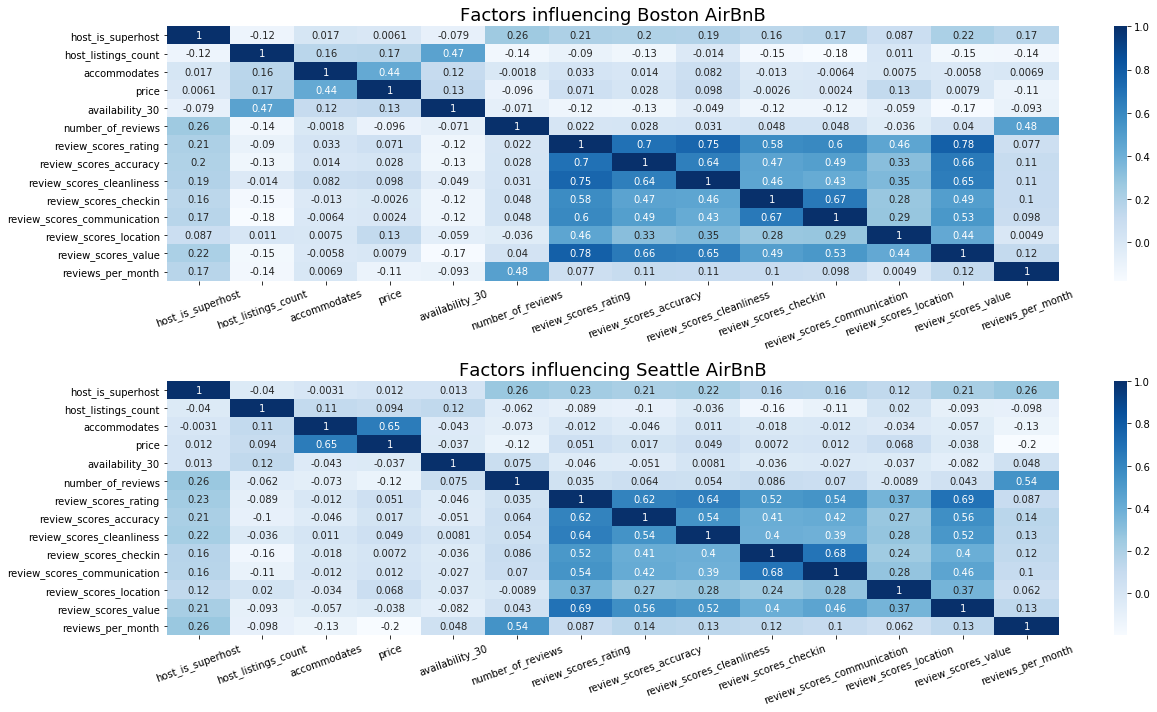

In [62]:
plt.figure(figsize=[18,10], tight_layout=True)

plt.subplot(2,1,1)
sb.heatmap(df_listing_bos_clean.corr(),cmap='Blues',annot=True);
plt.title('Factors influencing Boston AirBnB', fontdict={'fontsize':18});
plt.xticks(rotation=20);

plt.subplot(2,1,2)
sb.heatmap(df_listing_stl_clean.corr(),cmap='Blues',annot=True);
plt.title('Factors influencing Seattle AirBnB', fontdict={'fontsize':18})
plt.xticks(rotation=20);

plt.savefig('factors influencing price', dpi=500)

The factor that has highest correlation with pricing is 'accomodates': How many guest that a place can accomodate

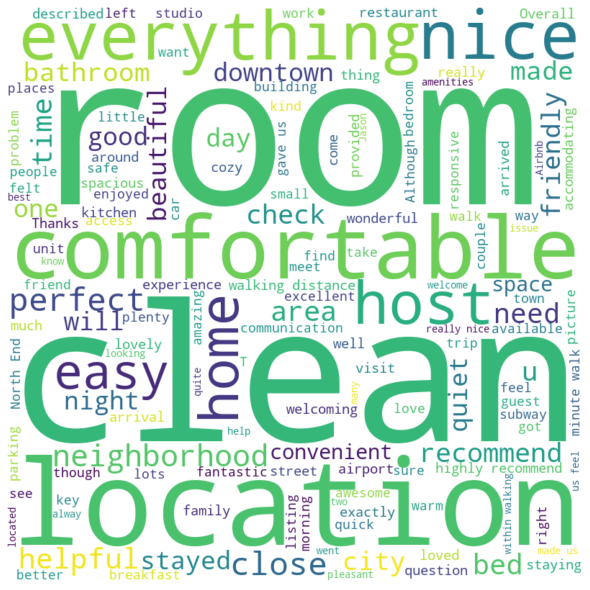

<Figure size 432x288 with 0 Axes>

In [63]:
# iterate through the comments column and change each value to string

comments =''

for char in df_reviews_bos.comments:
    char = str(char)
    words = char.split()   
    comments += " ".join(words)+" "

# Create stopword list:
stopwords=set(STOPWORDS)
stopwords.update(["Boston","stay","place","lot","use","even","able","go","found","back",
                  "Thank","needed","make","definitely",
                  "apartment","house","great"])

# Generate a word cloud image
wordcloud=WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comments)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

plt.savefig('wclouds Boston', dpi=500)


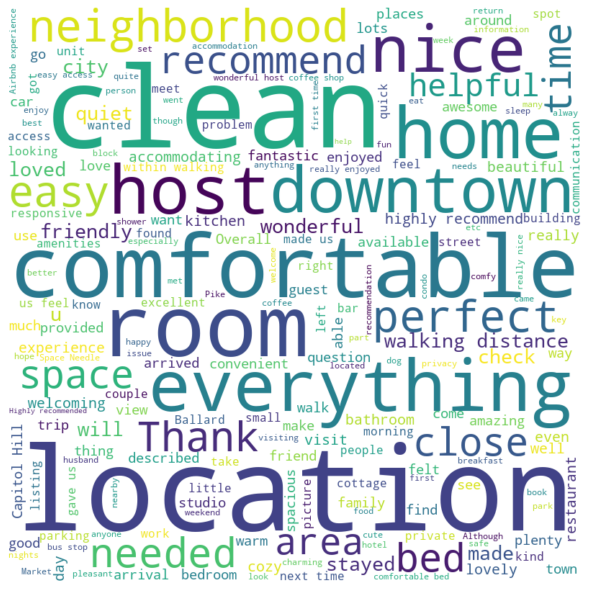

<Figure size 432x288 with 0 Axes>

In [64]:
# iterate through the comments column and change each value to string

comments =''

for char in df_reviews_stl.comments:
    char = str(char)
    words = char.split()   
    comments += " ".join(words)+" "

# Create stopword list:
stopwords=set(STOPWORDS)
stopwords.update(["Seattle","stay","place","exactly","definitely","staying","going",
                  "lot","house","apartment","night","need","one","two","back","great"])

# Generate a word cloud image
wordcloud=WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comments)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
plt.savefig('wclouds Seattle', dpi=500)

Most of the keywords are already captured by various review scores rating, for example: location, clean, host,

The keyword 'Everything' exists in both Boston and Seattle wordclouds. The word 'everything' probably is related to amenities suggesting that 'amenities" is important features that user is looking in the airBnB listing

# What are the must have amenities?

In [65]:
# split individual amenities
df_amenities=df_listing_bos.amenities.str.split(',',expand=True)


# Remove special characters from amenities dataframe
df_amenities=df_amenities.replace('[^\w\s]','', regex=True)

# Iterates to get all amenities to the list

amenities_ls=[]
for i in range(df_amenities.shape[1]):    
    amenities_ls= amenities_ls + df_amenities[i].unique().tolist()
    
    
# Get unique values of amenities
unique_amenities= set(amenities_ls)


# Remove '', None and translation missing..

unique_amenities.remove('')
unique_amenities.remove(None)
unique_amenities.remove('translation missing enhosting_amenity_50')
unique_amenities.remove('translation missing enhosting_amenity_49')

# Remove Dog, Cat and replace it with Dog, Cat
unique_amenities.remove('Cats')
unique_amenities.remove('Dogs')
unique_amenities.add('Cat')
unique_amenities.add('Dog')


# calculate the % of times each amenity exist
amenities_percent=[]
for item in list(unique_amenities):
    amenities_percent.append(sum(df_listing_bos.amenities.str.contains(item))/df_listing_bos.amenities.size)
    
# create a dataframe for amenity and % of time it exist
data={'amenities':list(unique_amenities), 'exist':amenities_percent }
df_amenities_bos = pd.DataFrame(data)

# sort from low to high
df_amenities_bos.sort_values(by=['exist'], ascending=True,inplace=True)

df_amenities_bos =df_amenities_bos.reset_index(drop=True)


In [66]:
# split individual amenities
df_amenities=df_listing_stl.amenities.str.split(',',expand=True)


# Remove special characters from amenities dataframe
df_amenities=df_amenities.replace('[^\w\s]','', regex=True)

# Iterates to get all amenities to the list

amenities_ls=[]
for i in range(df_amenities.shape[1]):    
    amenities_ls= amenities_ls + df_amenities[i].unique().tolist()
    
    
# Get unique values of amenities
unique_amenities= set(amenities_ls)

# Remove '', None and translation missing..

unique_amenities.remove('')
unique_amenities.remove(None)


# Remove Dog, Cat and replace it with Dog, Cat
unique_amenities.remove('Cats')
unique_amenities.remove('Dogs')
unique_amenities.add('Cat')
unique_amenities.add('Dog')


# calculate the % of times each amenity exist
amenities_percent=[]
for item in list(unique_amenities):
    amenities_percent.append(sum(df_listing_stl.amenities.str.contains(item))/df_listing_stl.amenities.size)
    
# create a dataframe for amenity and % of time it exist
data={'amenities':list(unique_amenities), 'exist':amenities_percent }
df_amenities_stl = pd.DataFrame(data)

# sort from low to high
df_amenities_stl.sort_values(by=['exist'], ascending=True,inplace=True)

df_amenities_stl=df_amenities_stl.reset_index(drop=True)


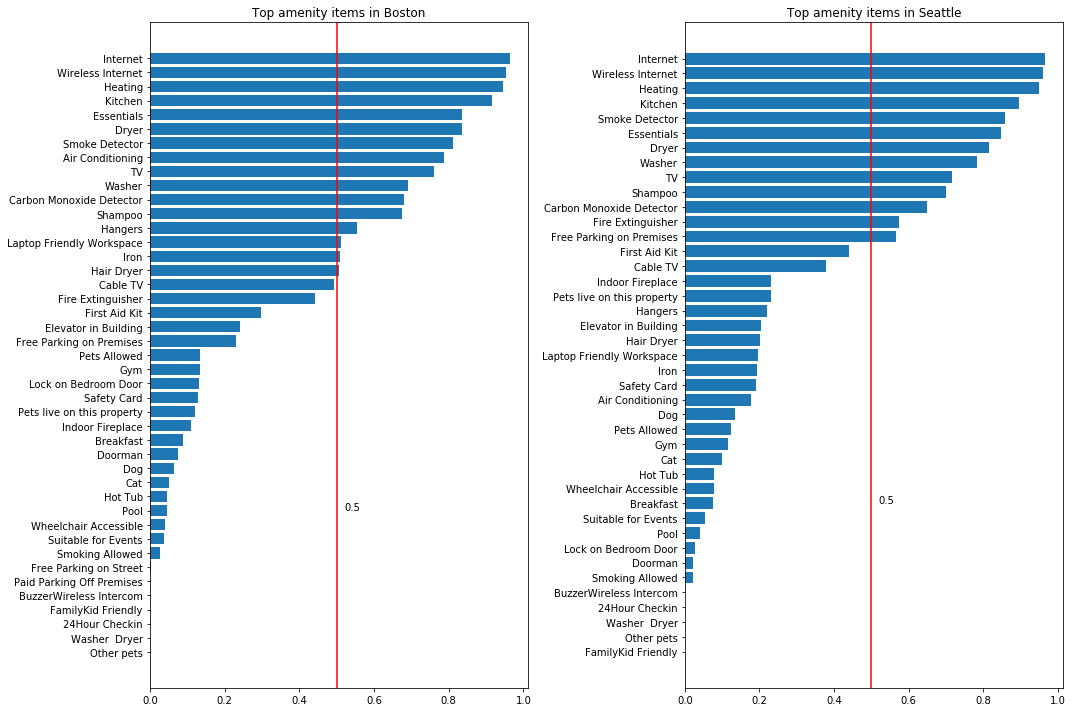

In [67]:
plt.figure(figsize=[15,10],tight_layout=True,clear=True);

# To plot Boston
plt.subplot(1,2,1);
plt.barh(df_amenities_bos.amenities, df_amenities_bos.exist);
plt.axvline(0.5, color='r')
plt.text(0.52,10,'0.5')
plt.title('Top amenity items in Boston');


# To plot Seattle
plt.subplot(1,2,2);
plt.barh(df_amenities_stl.amenities, df_amenities_stl.exist);
plt.axvline(0.5, color='r')
plt.text(0.52,10,'0.5')
plt.title('Top amenity items in Seattle');

plt.savefig('amenities', dpi=500)


In Boston: 16 items exists in 50% of the total listings
In Seattle: 13 items exists in 50% of the total listings

Didn't know Shampoo is a must have!
Airconditioning is not important in Seattle
Laptop friendly workspace, Hangers,iron,Hair dryer are important in Boston but not Seattle



